### Model Comparison for Accuracy of Prediction

#### (A) Normalizing and Preprocessing Data

#### Steps:
- 1 - Evaluate the cleaned data, briefly.
- 2 - Create the required Numpy Arrays (ie. features, classes, and feature names)
- 3 - Normalize the attribute data (using preprocessing.StandardScaler())

#### (B) Creating Decision Tree

#### Steps:
- 1 - Train - Test Split
- 2 - Creating the Decision Classifier
- 3 - Displaying the Resulting Tree
- 4 - Measuring Accuracy of the Tree Result on Test Data
- 5 - Noting the result: 0.7302904564315352

#### (C) Comparison Decision Tree against other Models:
- 1 - K-Fold Cross Validation Score : 0.7335910652920962
- 2 - RandomForestClassifier : 0.7575279209621992
- 3 - SVM - Support Vector Machine : 0.7835910652920961
- rbf kernel: 0.8012886597938145
- sigmoid kernel: 0.7295317869415807
- poly kernel: 0.7887886597938144
- 4 - K-Nearest Neighbors : 0.7887886597938144
- 5 - Naive Bayes : 0.6316365979381443
- 6 - Logistic Regression: 0.7898195876288658
- 7 - Neural Network with Keras: 0.7939970016479492

#### Import Packages & Data

In [1]:
import pandas as pd

In [2]:
masses_data = pd.read_csv('Clean_Masses_Data.csv')

In [3]:
masses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   961 non-null    float64
 1   age       961 non-null    float64
 2   shape     961 non-null    float64
 3   margin    961 non-null    float64
 4   density   961 non-null    float64
 5   severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [4]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.339230,55.198751,2.633715,2.656608,2.680541,0.463059
std,1.792174,14.984472,1.313816,1.644017,0.866582,0.498893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,45.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


#### Create Pandas dataframe into Numpy Arrays

This allows it to be used by scikit_learn

There will be 2 arrays:
- One array will contain only with the extracted features that are needed to work with - age, shape, margin and density.
- The other will contain the classes - ie. severity.

Note: An additional array will also be needed to create the feature name labels.

In [5]:
#FEATURES ARRAY
all_features = masses_data[['age', 'shape',
                             'margin', 'density']].values

In [6]:
all_features

array([[67.,  3.,  5.,  3.],
       [43.,  1.,  1.,  0.],
       [58.,  4.,  5.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [7]:
#CLASSES ARRAY
all_classes = masses_data['severity'].values

In [8]:
all_classes

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [9]:
#FEATURE NAME ARRAY
feature_names = ['age', 'shape', 'margin', 'density']

In [10]:
feature_names

['age', 'shape', 'margin', 'density']

#### Normalization

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.78797526,  0.27894004,  1.42614849,  0.3688343 ],
       [-0.81451671, -1.24413595, -1.00818312, -3.09484416],
       [ 0.18704077,  1.04047803,  1.42614849,  0.3688343 ],
       ...,
       [ 0.58766376,  1.04047803,  1.42614849,  0.3688343 ],
       [ 0.72120476,  1.04047803,  1.42614849,  0.3688343 ],
       [ 0.45412277,  0.27894004,  0.20898268,  0.3688343 ]])

#### Train - Test Split

Data will be split 75% for training and 25% for testing.  This is a fairly standard way of splitting the data, as you should have more data for training than testing, in general, however there are exceptions and cases where this may differ for particular reasons to other cases.

In [13]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

#### Decision Classifier

The Decision classifier is used to fit to the training data.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf= DecisionTreeClassifier(random_state=1)

In [16]:
# Train the classifier on the training set
clf.fit(training_inputs, training_classes)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Display the resulting Decision Tree

C:\Users\e2bar\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


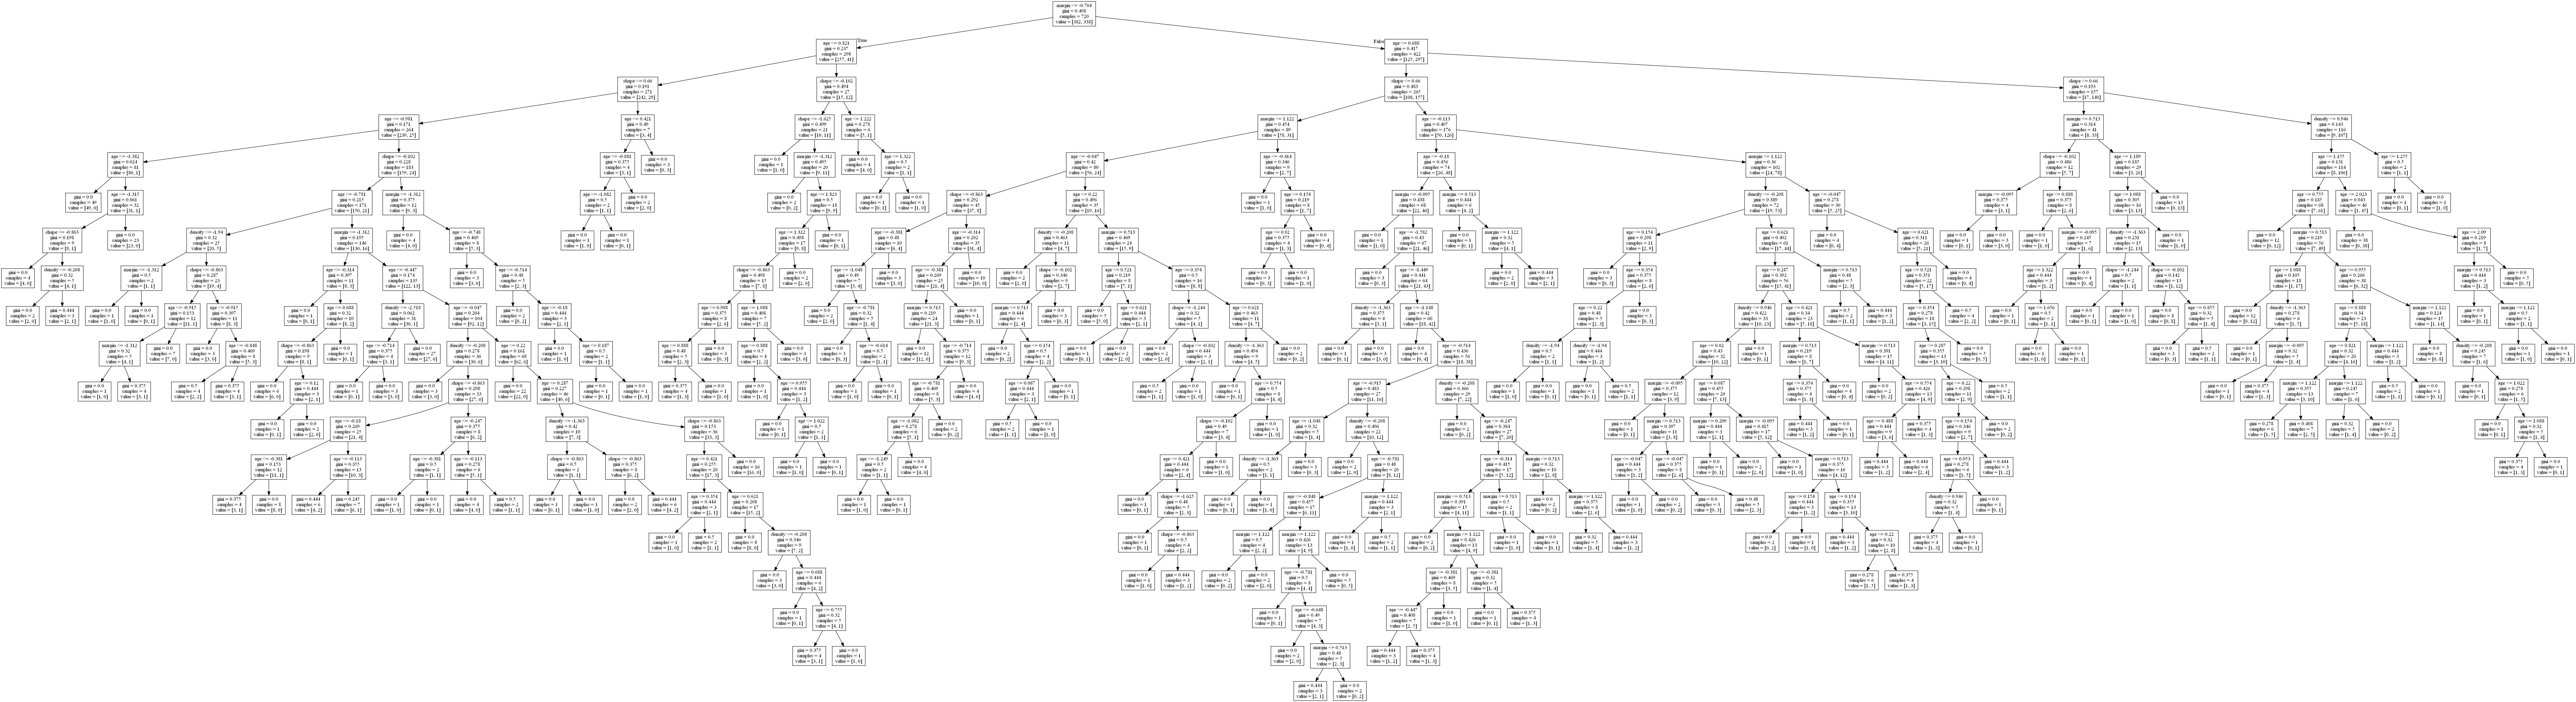

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Note: for sklearn.externals.six you may receive an error "No module named sklearn.externals.six".  
#This was removed with scikit-learn version 0.23 and would need to downgrade to 0.22 to use it.
#You can do this through command prompt >> pip install --upgrade scikit-learn==0.22
#Additionally you may need to instruct Anaconda (either through notebook or anaconda prompt) to install pydotplus
#This can be done with command: "pip install pydotplus"

#### Measuring the Accuracy of the Resulting Decision Tree - Using the Test Data

In [18]:
clf.score(testing_inputs, testing_classes)

0.7302904564315352

One thing to note that isn't obvious by this notebook is the following.  In the assignment exercise through the Udemy course, the NaN rows werre dropped and the accuracy of the modell was just slightly higher: 0.7355769230769231.  Whereas, the above value is lower and seems to stem from the fact that in my cleaning I replaced the NaN with zeros.  Something to keep in mind for the futurre, as this type of action may in some cases change the outcome just like this and should be evaluated in both ways to determine what would be the best direction.

#### Using K-Fold Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7335910652920962

#### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7575279209621992

#### Support Vector Machine

In [21]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [22]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7835910652920961

In [23]:
#SVM may perform differently when it's tuned for it's hyperparameter "kernels".  
#The following kernels can be used: rbf, sigmoid, poly kernels.
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8012886597938145

In [24]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7295317869415807

In [25]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7887886597938144

#### K-Nearest Neighbors (KNN)

In [26]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

#K = 10 is randomly selected here, however it can be further tuned for better results ; considered a hyperparameter.

0.7887886597938144

In [27]:
#We can make a loop to test KNN with different sets of K
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.7118019759450172
2 0.6846864261168386
3 0.755444587628866
4 0.7284149484536083
5 0.7877469931271477
6 0.7690077319587629
7 0.796080326460481
8 0.7825386597938144
9 0.7877577319587629
10 0.7887886597938144
11 0.789830326460481
12 0.7804445876288659
13 0.7877362542955326
14 0.780444587628866
15 0.7866945876288659
16 0.7794136597938144
17 0.7897981099656357
18 0.7846112542955328
19 0.7887779209621993
20 0.7887671821305843
21 0.7877362542955326
22 0.7846219931271478
23 0.7887886597938144
24 0.789830326460481
25 0.7908719931271478
26 0.7939969931271478
27 0.787757731958763
28 0.7877469931271478
29 0.7887886597938145
30 0.7887886597938144
31 0.7898410652920963
32 0.7887993986254296
33 0.7867268041237113
34 0.7877469931271478
35 0.7846327319587629
36 0.7856743986254295
37 0.787757731958763
38 0.7887886597938145
39 0.787757731958763
40 0.787757731958763
41 0.790882731958763
42 0.7856743986254295
43 0.7835803264604813
44 0.7825601374570448
45 0.7815399484536083
46 0.7804982817869417
47 0.78

#### Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.6316365979381443

#### Logistic Regression

Note: Since the task at hand is a binary classification, it's likely Logistic Regression will give the best output.

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7898195876288658

Note: Or maybe not.

#### Neural Networks (Keras)

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [31]:
def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [33]:
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7939970016479492

#### The Winner:
- SVM rbf kernel: 0.8012886597938145

#### <a href="https://github.com/ElenaE873/classifying_predicting_mammogrammasses/blob/main/Project%20Log.ipynb">Go Back to Project log</a>